Convolutional kunnen we patronen mee herkennen.<br />
Hoe we dit doen is het makkelijkste uit te legen met een foto een foto heeft een
'width' en een 'height' veder is een pixel een combinatie van RGB dit noemen we the
'depth' RGB kunnen een warden hebben van 0 tot 255 oftewel 256 verschillenden opties.
We pakken een deel van de foto dit noemen we een patch dat zet een deel om naar van 256x256x256
om dat we het kleiner maken krijgen we bijvoorbeeld 128x128x16 64x64x64 32x32x256

In [1]:
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Dense

Using TensorFlow backend.


De dataset die ik gebruik is de dataset van keras zelf imdb deze hebben we ook voor de opdracht gebruikt was ik will doen is kijken of dat ik een beter resultar kan krijgen

In [3]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20 # gebruik alleen de eerste 20 woorden van iedere review (voor efficiency)

In [5]:
print(imdb)

<function load_data at 0x00000175C56C10D8>


In [7]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

# gebruik alleen de eerste 20 woorden
# vul sequences korter dan 20 woorden aan met nullen
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen = maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen = maxlen)

In [8]:
x_train

array([[  65,   16,   38, ...,   19,  178,   32],
       [  23,    4, 1690, ...,   16,  145,   95],
       [1352,   13,  191, ...,    7,  129,  113],
       ...,
       [  11, 1818, 7561, ...,    4, 3586,    2],
       [  92,  401,  728, ...,   12,    9,   23],
       [ 764,   40,    4, ...,  204,  131,    9]])

In [ ]:
x_val_set = x_train[:10000]
x_train_set = x_train[10000:]

y_val_set = y_train[:10000]
y_train_set = y_train[10000:]

In [3]:
y_train_set

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

Embedding van de layers 

In [4]:
from keras.layers import Embedding

model = Sequential()
model.add(Embedding(max_features, 16, input_length = maxlen))
model.add(Conv1D(10, 10, activation = 'relu'))
model.add(Flatten())
model.add(Dense(1, activation = 'relu'))

In [5]:
model.compile(optimizer = 'rmsprop',
              metrics = ['acc'],
             loss = 'binary_crossentropy')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 16)            160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 11, 10)            1610      
_________________________________________________________________
flatten (Flatten)            (None, 110)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 111       
Total params: 161,721
Trainable params: 161,721
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(x_train_set, y_train_set,
                    epochs = 10,
                    batch_size = 32,
                    validation_data = (x_val_set,
                                       y_val_set))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.6781 - acc: 0.6513 - val_loss: 0.5676 - val_acc: 0.7184

wat een beetje jammer is dat de val zet tussen de 76% en 72% blijft terwerl de acc in hoog blijft gaan

In [7]:
model_conv = Sequential()
model_conv.add(Embedding(max_features, 16, input_length=x_train_set.shape[1]))
model_conv.add(Conv1D(3, 4,activation = 'relu'))
model_conv.add(Flatten())
model_conv.add(Dense(1, activation='relu'))

In [8]:
model_conv.compile(optimizer = 'rmsprop',
              metrics = ['acc'],
             loss = 'binary_crossentropy')

model_conv.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 16)            160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 17, 3)             195       
_________________________________________________________________
flatten_1 (Flatten)          (None, 51)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 52        
Total params: 160,247
Trainable params: 160,247
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model_conv.fit(x_train_set, y_train_set,
                    epochs = 10,
                    batch_size = 32,
                    validation_data = (x_val_set, y_val_set))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.8908 - acc: 0.5959 - val_loss: 0.5825 - val_acc: 0.6971

Het 2de netwerk werkt een stuk beter wat in we ze is dat de acc niet zo hoog is als eerst maar werk bijna net zo goed.
Wat wel mooi is dat val_acc dit keer constant is gebleven dus we kunnen er van uit gaan adt dit beter werk.

In [10]:
loss, acc = model.evaluate(x_val_set, y_val_set)
print(acc)

313/313 [==============================] - 0s 761us/step - loss: 2.5210 - acc: 0.7122
0.7121999859809875


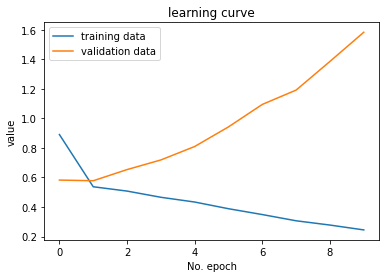

In [11]:
# Plot history
plt.plot(history.history['loss'], label='training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('learning curve')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend()
plt.show()
#beetje jammer dit.

